2/2 [==============================] - 0s 10ms/step
Epoch 0, Discriminator Loss: 11.885485827922821, Generator Loss: 0.7822095155715942
1/1 [==============================] - 0s 72ms/step


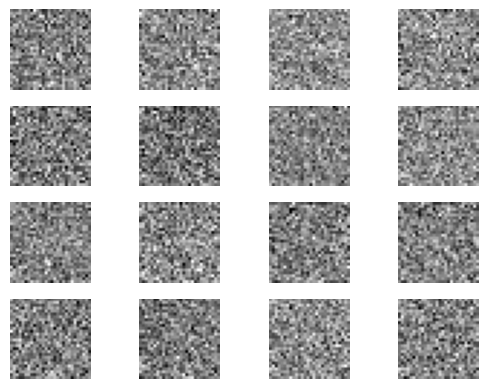

2/2 [==============================] - 0s 7ms/step
Epoch 100, Discriminator Loss: 0.13305869698524475, Generator Loss: 1.6893248558044434
1/1 [==============================] - 0s 33ms/step


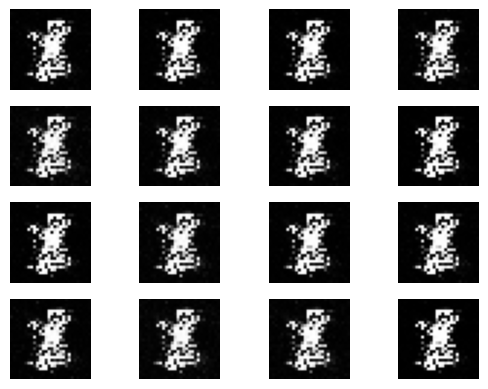

2/2 [==============================] - 0s 5ms/step
Epoch 200, Discriminator Loss: 0.113339364528656, Generator Loss: 1.616917610168457
1/1 [==============================] - 0s 31ms/step


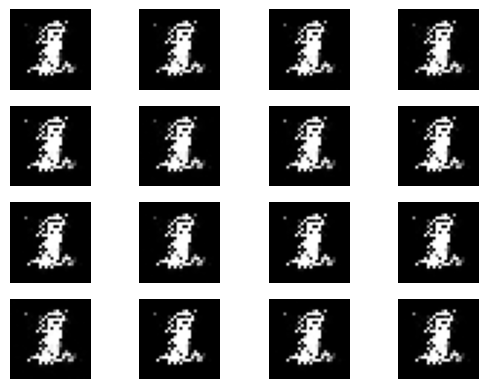

2/2 [==============================] - 0s 5ms/step
Epoch 300, Discriminator Loss: 0.0442008301615715, Generator Loss: 2.5287599563598633
1/1 [==============================] - 0s 23ms/step


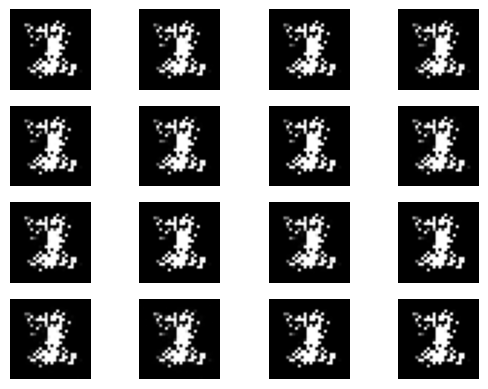

2/2 [==============================] - 0s 7ms/step
Epoch 400, Discriminator Loss: 0.027710504829883575, Generator Loss: 2.982210874557495
1/1 [==============================] - 0s 27ms/step


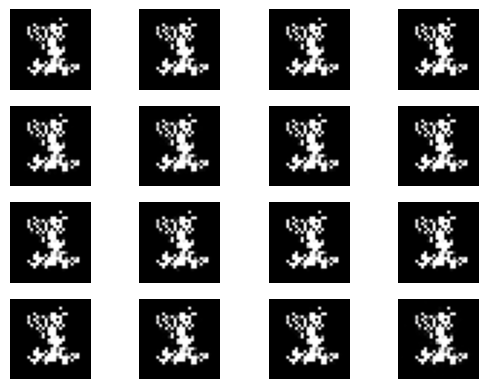

2/2 [==============================] - 0s 8ms/step
Epoch 500, Discriminator Loss: 0.01780335232615471, Generator Loss: 3.398682117462158
1/1 [==============================] - 0s 24ms/step


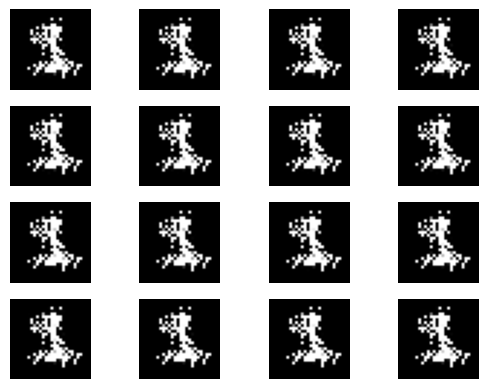

2/2 [==============================] - 0s 8ms/step
Epoch 600, Discriminator Loss: 0.11544357240200043, Generator Loss: 1.6967670917510986
1/1 [==============================] - 0s 32ms/step


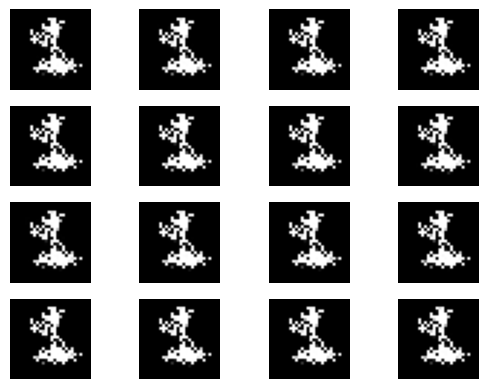

2/2 [==============================] - 0s 7ms/step
Epoch 700, Discriminator Loss: 0.015827450901269913, Generator Loss: 3.4936628341674805
1/1 [==============================] - 0s 24ms/step


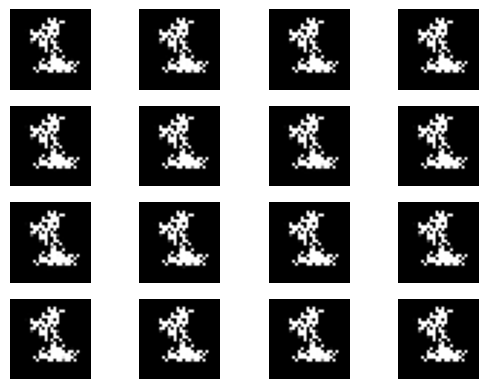

2/2 [==============================] - 0s 13ms/step
Epoch 800, Discriminator Loss: 0.014118602499365807, Generator Loss: 3.6071603298187256
1/1 [==============================] - 0s 25ms/step


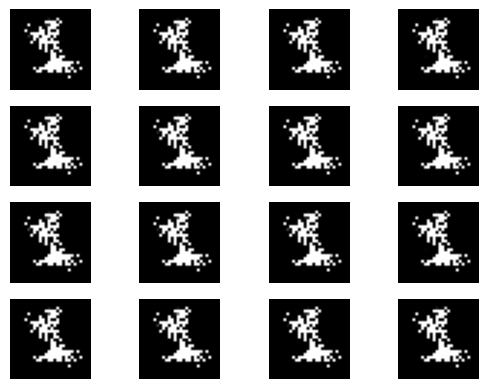

2/2 [==============================] - 0s 6ms/step
Epoch 900, Discriminator Loss: 0.04789811000227928, Generator Loss: 2.3982443809509277
1/1 [==============================] - 0s 29ms/step


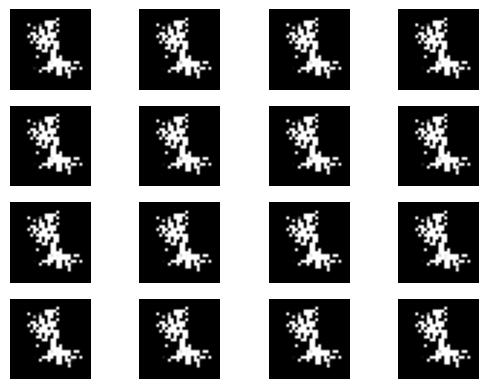

2/2 [==============================] - 0s 7ms/step
Epoch 1000, Discriminator Loss: 0.010209484957158566, Generator Loss: 3.954523801803589
1/1 [==============================] - 0s 25ms/step


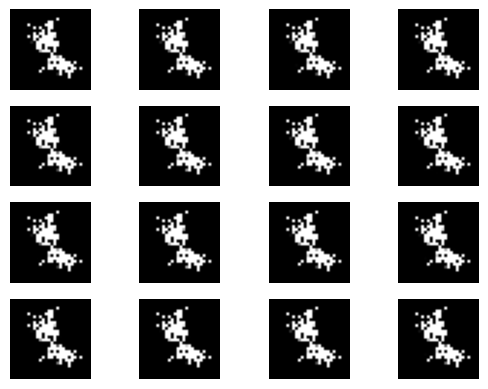

2/2 [==============================] - 0s 11ms/step
Epoch 1100, Discriminator Loss: 0.0038997649680823088, Generator Loss: 4.884818077087402
1/1 [==============================] - 0s 29ms/step


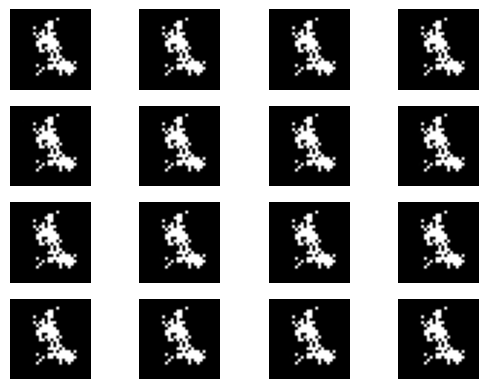

2/2 [==============================] - 0s 12ms/step
Epoch 1200, Discriminator Loss: 0.0057725002989172935, Generator Loss: 4.485573768615723
1/1 [==============================] - 0s 42ms/step


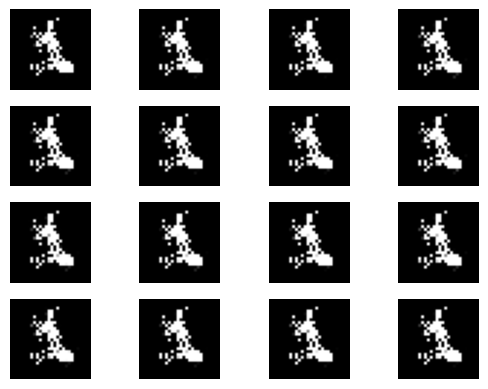

2/2 [==============================] - 0s 13ms/step
Epoch 1300, Discriminator Loss: 0.003467429196462035, Generator Loss: 4.991968154907227
1/1 [==============================] - 0s 36ms/step


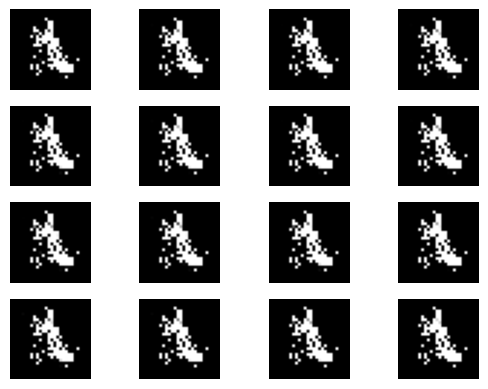

2/2 [==============================] - 0s 7ms/step
Epoch 1400, Discriminator Loss: 0.0020555113442242146, Generator Loss: 5.505250930786133
1/1 [==============================] - 0s 28ms/step


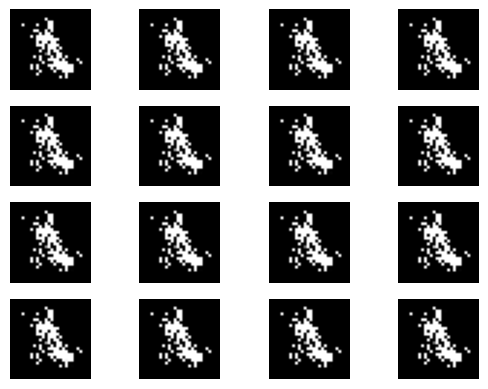

2/2 [==============================] - 0s 9ms/step
Epoch 1500, Discriminator Loss: 0.003230729606002569, Generator Loss: 5.069554328918457
1/1 [==============================] - 0s 26ms/step


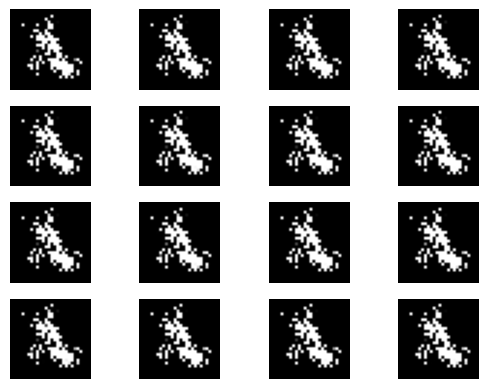

2/2 [==============================] - 0s 6ms/step
Epoch 1600, Discriminator Loss: 0.0024354809429496527, Generator Loss: 5.34787654876709
1/1 [==============================] - 0s 31ms/step


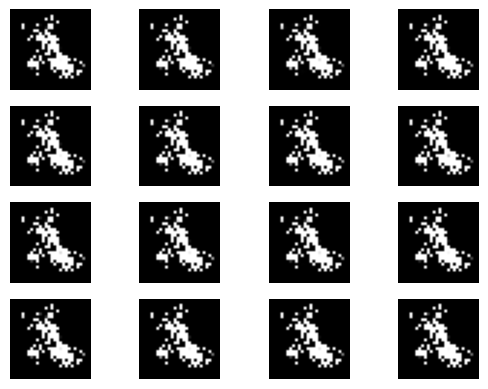

2/2 [==============================] - 0s 6ms/step
Epoch 1700, Discriminator Loss: 0.0030126855708658695, Generator Loss: 5.149412155151367
1/1 [==============================] - 0s 38ms/step


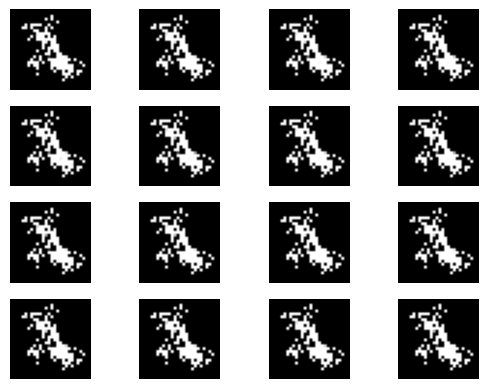

2/2 [==============================] - 0s 11ms/step
Epoch 1800, Discriminator Loss: 0.0014328253455460072, Generator Loss: 5.874847412109375
1/1 [==============================] - 0s 27ms/step


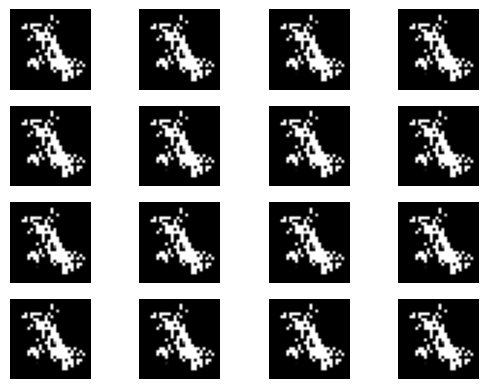

2/2 [==============================] - 0s 11ms/step
Epoch 1900, Discriminator Loss: 0.0014177225530147552, Generator Loss: 5.889860153198242
1/1 [==============================] - 0s 49ms/step


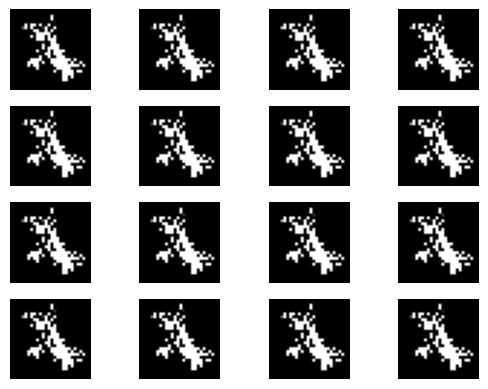

2/2 [==============================] - 0s 9ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


def build_generator(latent_dim):
  model = tf.keras.Sequential()
  model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
  model.add(layers.Dense(784, activation='sigmoid'))
  model.add(layers.Reshape((28, 28, 1)))
  return model


def build_discriminator(img_shape):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=img_shape))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

def build_gan(generator, discriminator):
  discriminator.trainable = False

  model = tf.keras.Sequential()
  model.add(generator)
  model.add(discriminator)
  return model

(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[y_train == 1]


discriminator = build_discriminator((28, 28, 1))
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


latent_dim = 100
generator = build_generator(latent_dim)


discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')


epochs = 10000
batch_size = 64


for epoch in range(epochs):

  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))


  generated_images = generator.predict(noise)

  idx = np.random.randint(0, x_train.shape[0], batch_size)
  real_images = x_train[idx]



  labels_real = np.ones((batch_size, 1))
  labels_fake = np.zeros((batch_size, 1))


  d_loss_real = discriminator.train_on_batch(real_images, labels_real)
  d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)


  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)



  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
  labels_gan = np.ones((batch_size, 1))
  g_loss = gan.train_on_batch(noise, labels_gan)




  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

    gen_imgs = generator.predict(np.random.normal(0, 1, size=(16, latent_dim)))
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig,axs = plt.subplots(4, 4)
    count = 0
    for i in range (4):
      for j in range(4):
        axs[i, j].imshow(gen_imgs[count, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        count +=1
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')